# Transform features in order to get a non linear relation

Realizar un scatter plot de las variables predictoras VS Response o Target y ver si los puntos siguen una tendencia lineal

De no ser así (exponencial,) será necesario transformar esa variable

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('../datasets/auto/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [10]:
df.shape

(406, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
model year      406 non-null int64
origin          406 non-null int64
car name        406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.6+ KB


In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


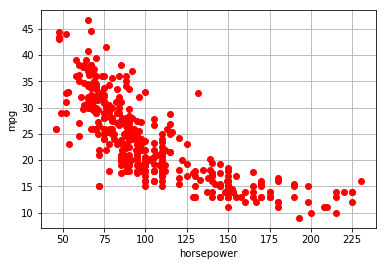

In [18]:
plt.plot(df['horsepower'],df['mpg'],'ro')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)

- Vemos si Feature y Target tienen una linealidad
- En este caso notamos una cierta NO linealidad
- Transformamos dicha variable
- Vemos si funciona
- De no ser así nos tendriamos que ir a modelos de regresión polinómica de grado > 1 o exponencial....

# Linear Regression Model

- mpg = a + b * horsepower

In [27]:
# Features Target
X = df['horsepower']
y = df['mpg']
X = X[:,np.newaxis]

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

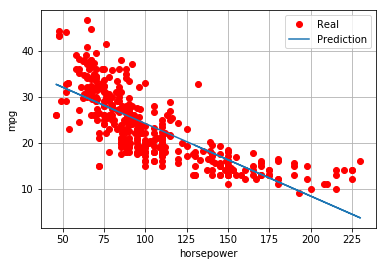

In [29]:
# Real vs prediction
plt.plot(X,y,'ro',label='Real')
plt.plot(X,lm.predict(X),label='Prediction')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.grid(True)

In [32]:
lm.score(X,y)

0.6059482578894348

In [39]:
SSD = np.sum((y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(df)-1-1))
error = RSE/np.mean(y)
print('SSD: %s\nRSE: %s\nerror: %s'%(SSD,RSE,error))

SSD: 9385.915871932419
RSE: 4.90575691954594
error: 0.2092371406691483


# Quadratic regression Model

- mpg = a + b * horsepower^2

In [40]:
# Features Target
X = df['horsepower']
y = df['mpg']
X = X[:,np.newaxis]
X = X**2

In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

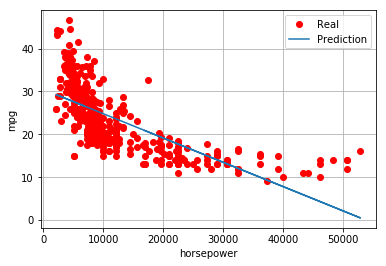

In [42]:
# Real vs prediction
plt.plot(X,y,'ro',label='Real')
plt.plot(X,lm.predict(X),label='Prediction')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.grid(True)

In [43]:
lm.score(X,y)

0.5073670089832611

In [44]:
SSD = np.sum((y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(df)-1-1))
error = RSE/np.mean(y)
print('SSD: %s\nRSE: %s\nerror: %s'%(SSD,RSE,error))

SSD: 11734.02199583266
RSE: 5.485183304753854
error: 0.23395045648512758


# Quadratic and Linear regression Model

- mpg = a + b * horsepower + c * horsepower^2

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [48]:
# Features Target
X = df['horsepower']
y = df['mpg']
X = X[:,np.newaxis]

In [49]:
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lm.score(X,y)

0.6875590305127517

In [52]:
SSD = np.sum((y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(df)-1-1))
error = RSE/np.mean(y)
print('SSD: %s\nRSE: %s\nerror: %s'%(SSD,RSE,error))

SSD: 7442.029411785949
RSE: 4.3683093636883195
error: 0.1863142784704075


In [57]:
lm.intercept_

56.900099702113096

In [59]:
lm.coef_

array([ 0.        , -0.46618963,  0.00123054])